In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost.sklearn import XGBRegressor

In [0]:
df = pd.read_csv('Movie_data.csv')

In [0]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
df['Successful'] = df['gross'] > df['budget']

df['Successful'].head()

0     True
1     True
2    False
3     True
4    False
Name: Successful, dtype: bool

In [0]:
len(df['language'].unique())

48

In [0]:
len(df['country'].unique())

66

In [0]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
Successful                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b01779630>,
      dtype=object)

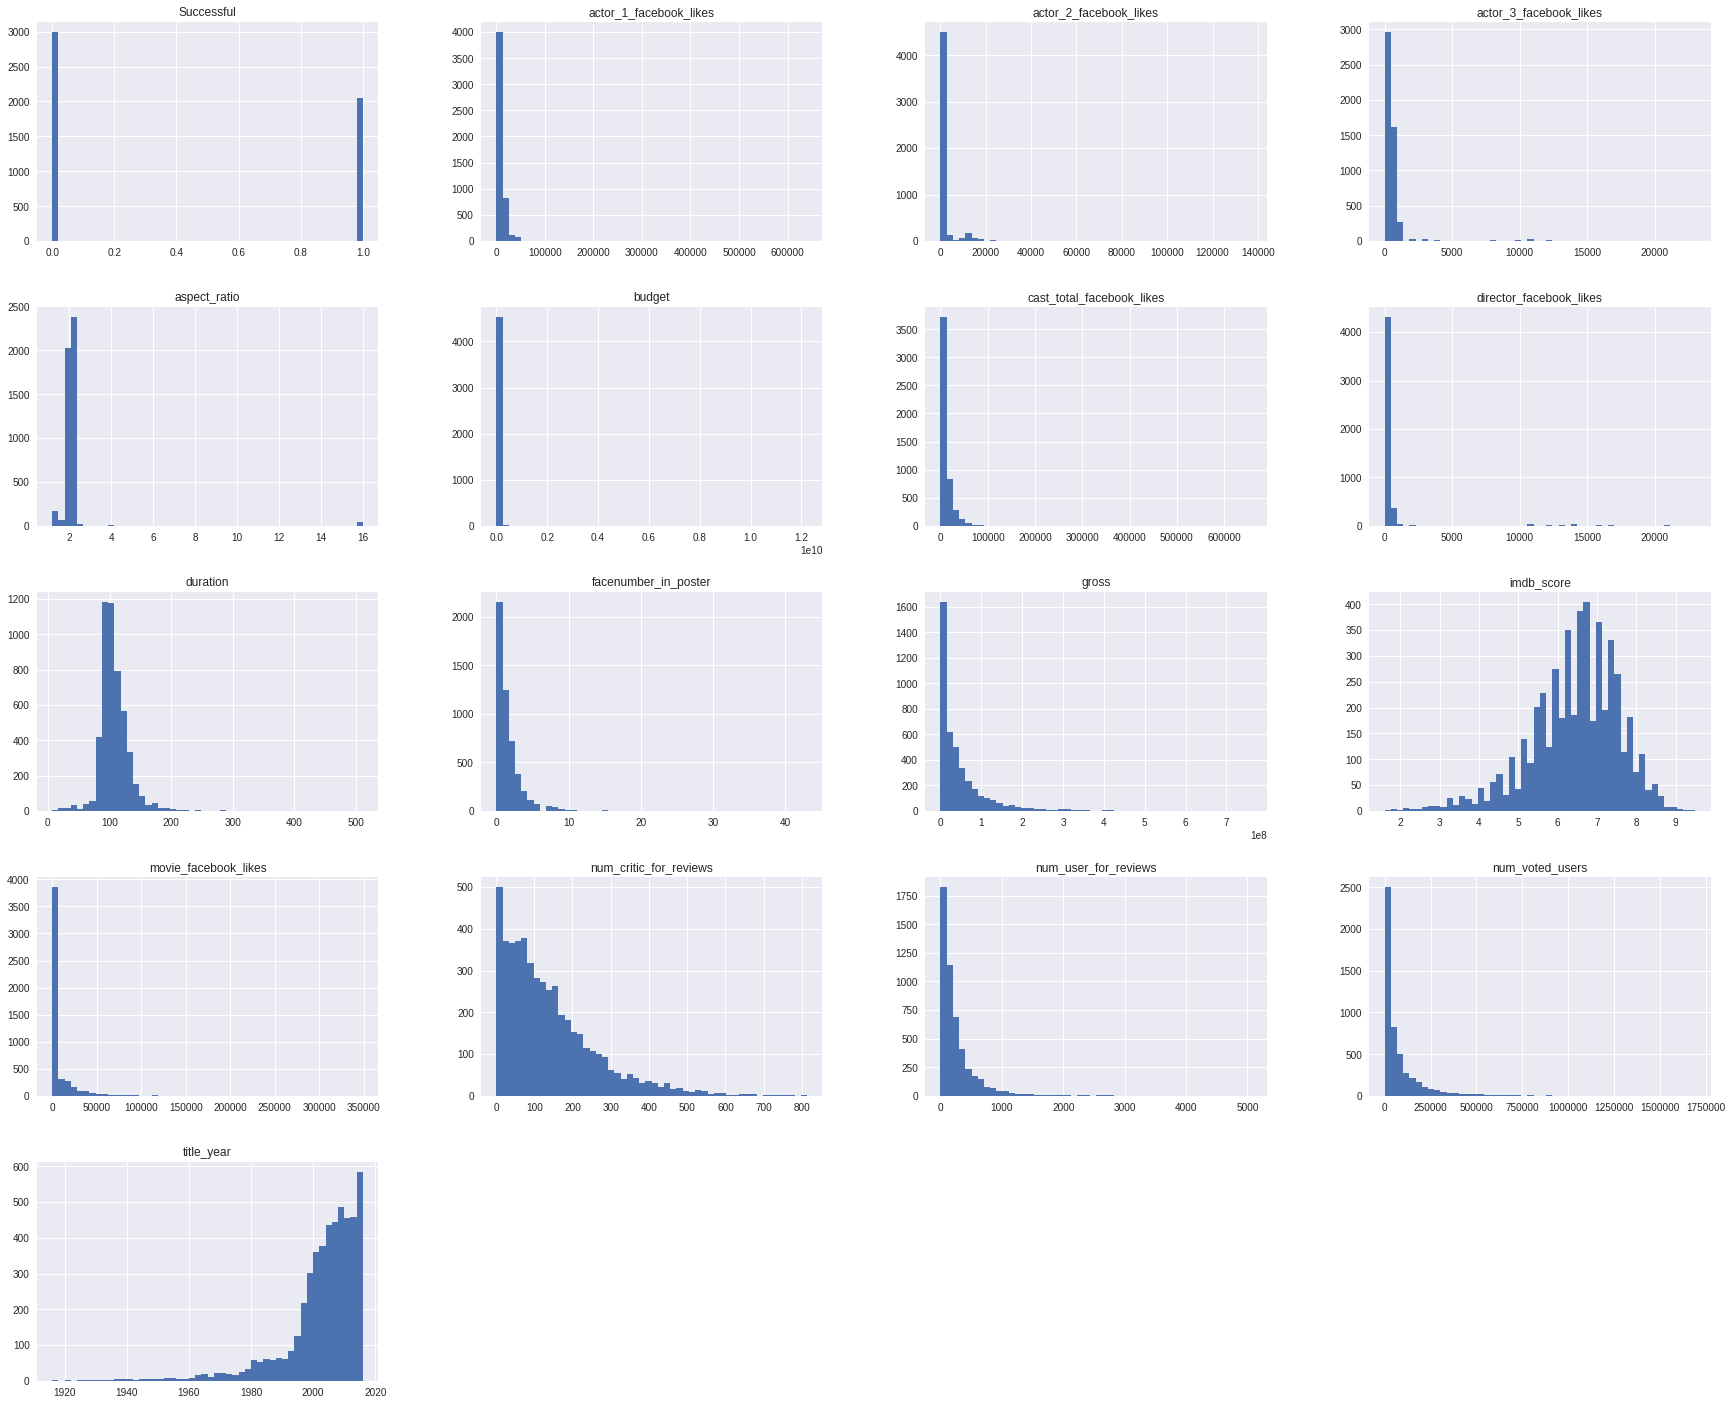

In [0]:
hist_data = df.drop(['color','director_name','content_rating','genres','actor_1_name','movie_title','actor_3_name','movie_imdb_link',],axis=1)
hist_data.hist(bins=50,figsize=(30,25))

In [0]:
column_str = ''
for i in df.columns:
  if i not in ['gross','content_rating','actor_1_name','actor_2_name','actor_3_name','budget','Successful']:
    column_str = column_str + '+' + i

In [0]:
column_str

'+color+director_name+num_critic_for_reviews+duration+director_facebook_likes+actor_3_facebook_likes+actor_1_facebook_likes+genres+movie_title+num_voted_users+cast_total_facebook_likes+facenumber_in_poster+plot_keywords+movie_imdb_link+num_user_for_reviews+language+country+title_year+actor_2_facebook_likes+imdb_score+aspect_ratio+movie_facebook_likes'

In [0]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
df['color'].mode()

0    Color
dtype: object

In [0]:
df['color'].replace(['Color',np.nan,' Black and White'],[0,0,1], inplace = True)

In [0]:
df['color'].unique()

array([0, 1])

In [0]:
df.director_name.replace(np.nan,'unknown',inplace=True)

In [0]:
num_critic_for_reviews_mean = df['num_critic_for_reviews'].mean()
num_critic_for_reviews_std = df['num_critic_for_reviews'].std()
startVal = num_critic_for_reviews_mean - num_critic_for_reviews_std
stopVal = num_critic_for_reviews_mean + num_critic_for_reviews_std

print(startVal)
print(stopVal)

18.592596584541965
261.7959473770042


In [0]:
df['num_critic_for_reviews'].fillna(value = random.randint(int(startVal),int(stopVal)),inplace=True)

In [0]:
df['num_critic_for_reviews'].head()

0    723.0
1    302.0
2    602.0
3    813.0
4     37.0
Name: num_critic_for_reviews, dtype: float64

In [0]:
df['duration'].fillna(value = df['duration'].mean(),inplace=True)

In [0]:
df['director_facebook_likes'].fillna(value = int(df['director_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_3_facebook_likes'].fillna(value = int(df['actor_3_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_1_facebook_likes'].fillna(value = int(df['actor_1_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_2_facebook_likes'].fillna(value = int(df['actor_2_facebook_likes'].mean()),inplace=True)

In [0]:
gross_mean = int(df['gross'].mean())
gross_std = int(df['gross'].std())

startVal = gross_std - gross_mean
stopVal = gross_mean + gross_std

print(gross_mean,gross_std)
print(startVal,stopVal)

48468407 68452990
19984583 116921397


In [0]:
df['gross'].fillna(value = random.randint(startVal,stopVal), inplace = True)

In [0]:
df['Successful'] = df['gross'] > df['budget']

df['Successful'].head()

0     True
1     True
2    False
3     True
4    False
Name: Successful, dtype: bool

In [0]:
df['facenumber_in_poster'].fillna(value = int(df['facenumber_in_poster'].mode()), inplace = True)

In [0]:
df = pd.concat([df,pd.get_dummies(df['director_name'])],axis=1)

In [0]:
df = pd.concat([df,pd.get_dummies(df['genres'])],axis=1)

In [0]:
df = pd.concat([df,pd.get_dummies(df['plot_keywords'])],axis=1)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,stage magician,stand up comedy,student film|wonder years,three word title,title spoken by character,true crime,two word title,woman wearing only a man's shirt,written and directed by cast member,zombie|zombie spoof
0,0,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
1,0,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,0,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,0,0,0
3,0,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,0,0,0,0
4,0,Doug Walker,37.0,107.201074,131.0,645.0,Rob Walker,131.0,49905225.0,Documentary,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df = pd.concat([df,pd.get_dummies(df['language'])],axis=1)

In [0]:
df = pd.concat([df,pd.get_dummies(df['country'])],axis=1)

In [0]:
df = pd.concat([df,pd.get_dummies(df['content_rating'])],axis=1)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Passed,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,Unrated,X
0,0,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
1,0,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,0,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,0,0,0
3,0,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,0,0,0,0
4,0,Doug Walker,37.0,107.201074,131.0,645.0,Rob Walker,131.0,49905225.0,Documentary,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df.fillna(value=0,inplace=True)

df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
Successful                   0
A. Raven Cruz                0
                            ..
South Korea                  0
Soviet U

In [0]:
i = 0

while i < len(df['Successful']):
  1 if df['Successful'][i] else 0
  i += 1

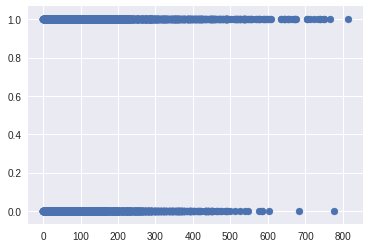

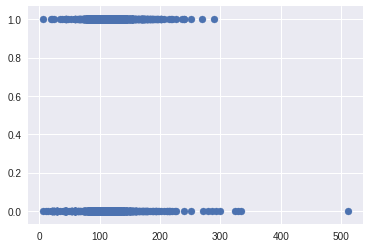

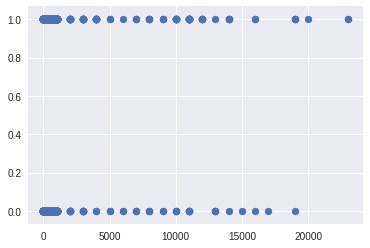

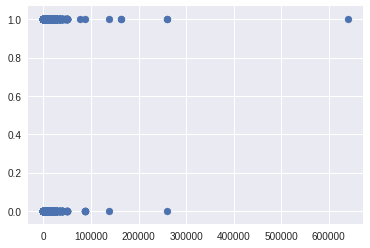

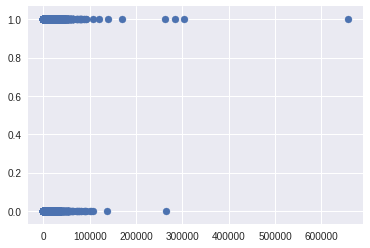

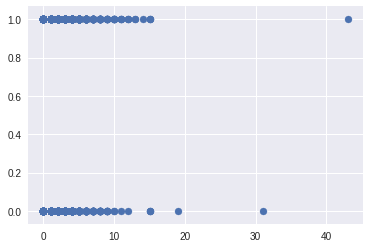

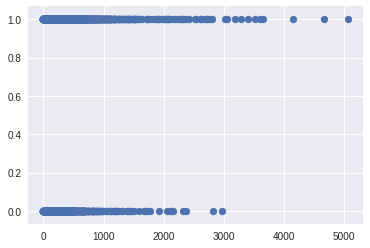

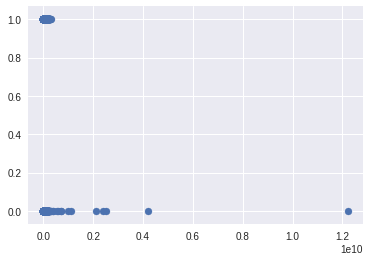

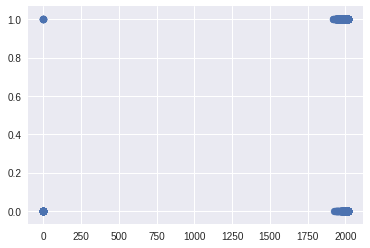

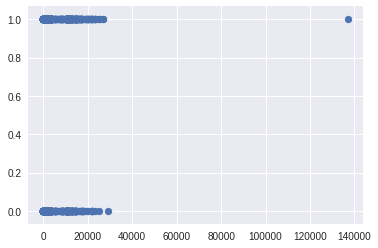

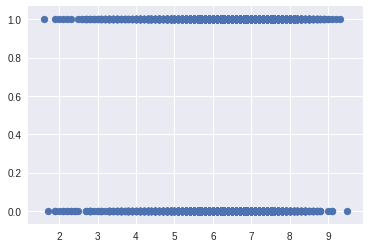

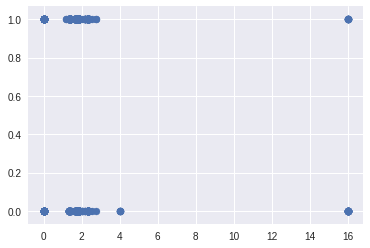

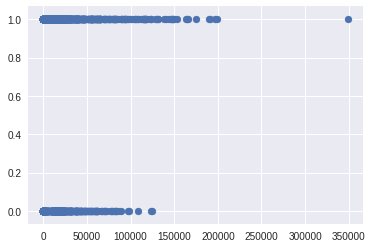

In [0]:
# fig, ax = plt.subplots(4,4)
plt.scatter(x=df['num_critic_for_reviews'],y=df['Successful']) #Scatter Plot for features vs labels ,ax=ax[0][0],figsize=(25,20)
plt.show()
plt.scatter(x=df['duration'],y=df['Successful'])
plt.show()
plt.scatter(x=df['actor_3_facebook_likes'],y=df['Successful'])
plt.show()
plt.scatter(x=df['actor_1_facebook_likes'],y=df['Successful'])
plt.show()
plt.scatter(x=df['cast_total_facebook_likes'],y=df['Successful'])
plt.show()
plt.scatter(x=df['facenumber_in_poster'],y=df['Successful'])
plt.show()
plt.scatter(x=df['num_user_for_reviews'],y=df['Successful'])
plt.show()
plt.scatter(x=df['budget'],y=df['Successful'])
plt.show()
plt.scatter(x=df['title_year'],y=df['Successful'])
plt.show()
plt.scatter(x=df['actor_2_facebook_likes'],y=df['Successful'])
plt.show()
plt.scatter(x=df['imdb_score'],y=df['Successful'])
plt.show()
plt.scatter(x=df['aspect_ratio'],y=df['Successful'])
plt.show()
plt.scatter(x=df['movie_facebook_likes'],y=df['Successful'])
plt.show()

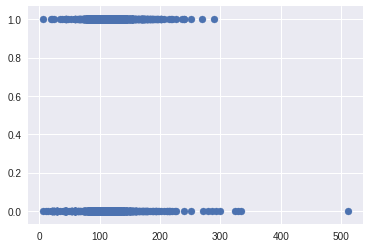

In [0]:
plt.scatter(x=df['duration'],y=df['Successful'])
plt.show()

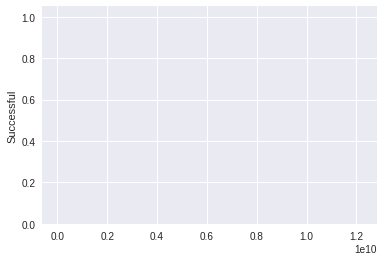

In [0]:
p1 = plt.bar('budget',height = 1,width = 0.2,data = df, color='#d62728')
p2 = plt.bar('gross',height = 1,width = 0.2,data = df)
# p2 = plt.bar(df, 'gross', width = 0.2,
#              bottom='title_year')

plt.ylabel('Successful')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.show()

In [0]:
x = df.drop(['director_name','genres','actor_2_name','actor_1_name','Successful','budget','actor_3_name','movie_title','gross','language','movie_imdb_link','country','content_rating','aspect_ratio','plot_keywords'],axis=1)

In [0]:
y = df['Successful']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.3)

In [0]:
lr = LogisticRegression()

In [0]:
lr.fit(x_train.values,y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
lr.score(x_train,y_train)

0.6396600566572238

In [0]:
lr.score(x_test,y_test)

0.612690019828156

In [0]:
def rr_optimal():
  train_score = []
  test_score = []
  for i in range(1,51):
    rr = RandomForestClassifier(n_estimators=i)
    rr.fit(x_train.values,y_train.values)
    train_score.append(rr.score(x_train,y_train))
    test_score.append(rr.score(x_test,y_test))
  return train_score, test_score  

In [0]:
estimators_train, estimators_test = rr_optimal()

In [0]:
best_estimators_test = estimators_test.index(max(estimators_test))+1

best_estimators_test

27

In [0]:
rr = RandomForestClassifier(n_estimators=best_estimators_test)

In [0]:
rr.fit(x_train.values,y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
rr.score(x_train,y_train)

0.9988668555240793

In [0]:
rr.score(x_test,y_test)

0.6801057501652347